In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import library.timedomain as td
import library.fileprocessing as fp
import glob,sys
c = 299792458

# Process One Multisweep file

In [ ]:
#Process one multisweep file

F = fp.loadfile_frequency('../../phase_work/frequency.txt')
timestamps,phase_data = fp.loadfile_multisweep('../../phase_work/08-45-36.510483.txt')

delay1 = np.empty(0) 
delay2 = np.empty(0)
for data in phase_data:
    temp_delay1,temp_delay2,temp1,temp2 = td.transform(F,data,overs=1000)
    delay1 = np.append(delay1,temp_delay1)
    delay2 = np.append(delay2,temp_delay2)

# Process File with Reduced data
    
    

In [7]:
cd phase_work/Exp7/

[Error 3] The system cannot find the path specified: u'phase_work/Exp7/'
C:\Users\Roufurd\Documents\python_work\phase_work\Exp7


In [37]:
#Process Reduced data results file

timestamps = np.empty(0)
delay1 = np.empty(0)
delay2 = np.empty(0)
height1 = np.empty(0)
height2 = np.empty(0)
data = np.loadtxt('Exp7_data.csv',dtype='float',delimiter=',',skiprows=1)
timestamps = data[:,0];delay1 = data[:,1];height1 = data[:,2];delay2 = data[:,3];height2 = data[:,4]
timestamps_offset = timestamps - min(timestamps)

ValueError: x and y must have same first dimension

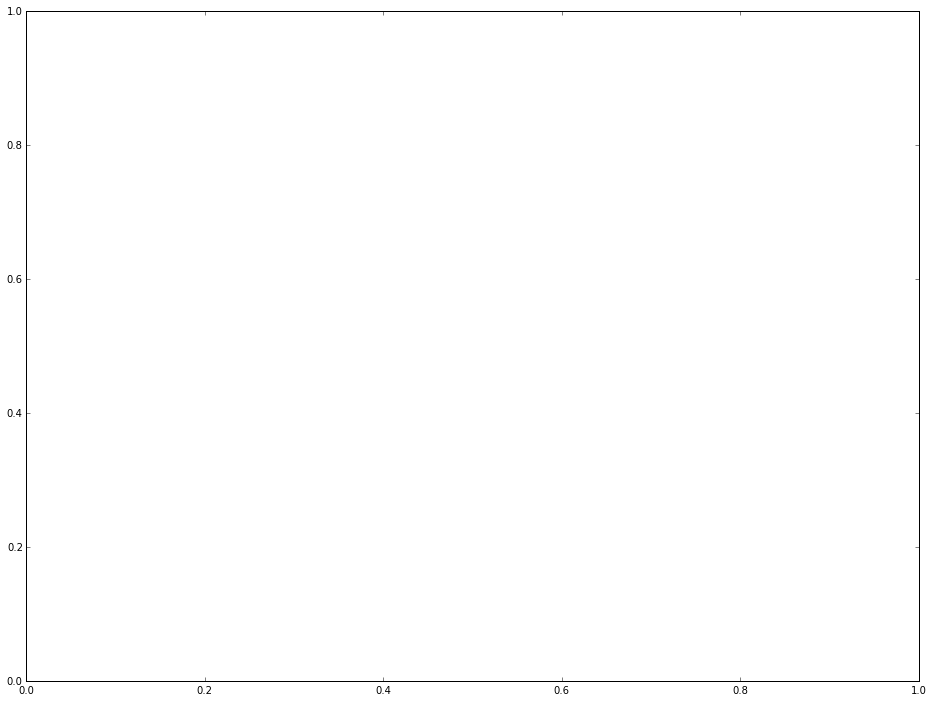

In [59]:
#zoomed_slice = slice(1500,)
plt.figure(figsize=(16,12))
plt.plot(timestamps_offset[1500:],delay1[1500:],'b')
plt.grid(True)

In [19]:
#Determine indices where amplitude heights of pulses swopped position and make those points equal to mean delay
#This is an artifact of the peak detection code. 
#Peak detection code algorithm uses pulse amplitude to determine first and second peaks

temp_delay1 = np.copy(delay1)
temp_delay2 = np.copy(delay2)
indices = []
counter = 0
threshold = 0.01
for i in range(len(delay2)-1):
    if np.abs(delay2[i+1]-delay2[i]) > threshold:
        indices.append(i)
        counter+=1        
print counter
temp_delay1[indices] = np.mean(delay1) 
temp_delay2[indices] = np.mean(delay2) 

194


In [40]:
#If no re-ordering is required
temp_delay1 = np.copy(delay1)[1500:]
temp_delay2 = np.copy(delay2)[1500:]
timestamps_offset = timestamps_offset[1500:]

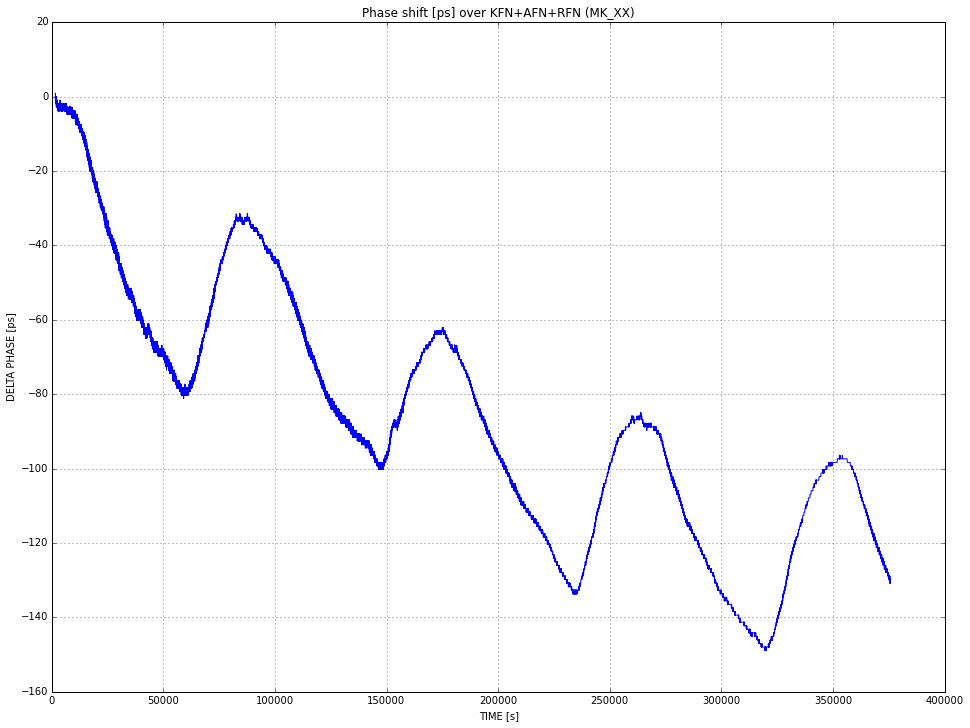

In [54]:
#Plot Delta delay of First peak of data
#This is with data where few out of order peaks were rearranged

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,0.5*(temp_delay1-temp_delay1[0])/c*1e12)
plt.title('Phase shift [ps] over KFN+AFN+RFN (MK_XX)')
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

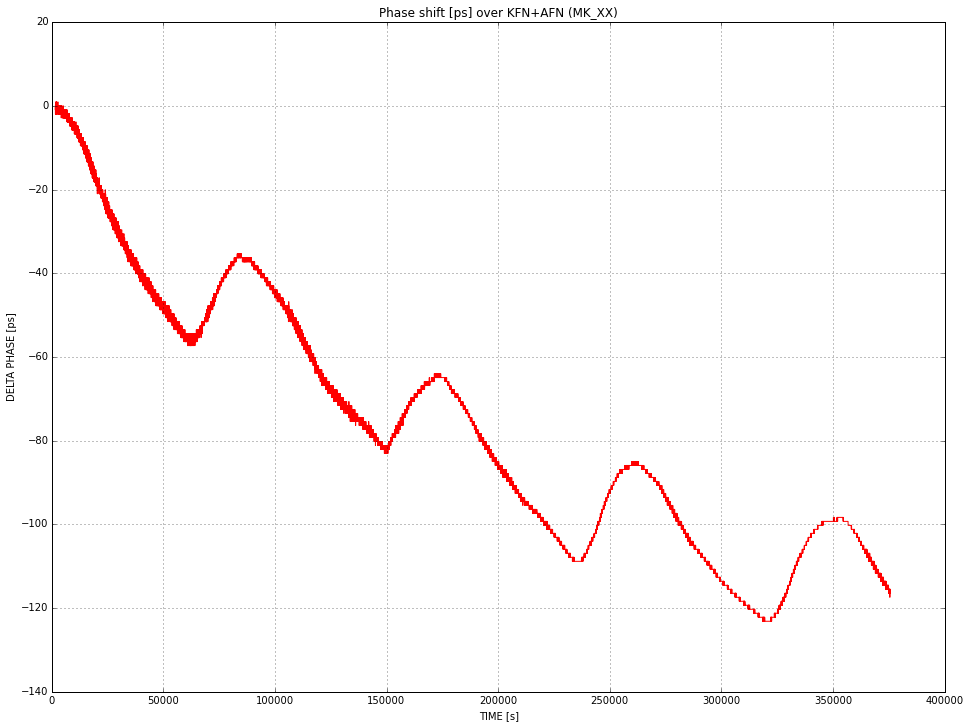

In [55]:
#Plot Delta delay of Second peak
#This is with data where few out of order peaks were rearranged

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,0.5*(temp_delay2-temp_delay2[0])/c*1e12,'r')
plt.title('Phase shift [ps] over KFN+AFN (MK_XX)')
plt.xlabel('TIME [s]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

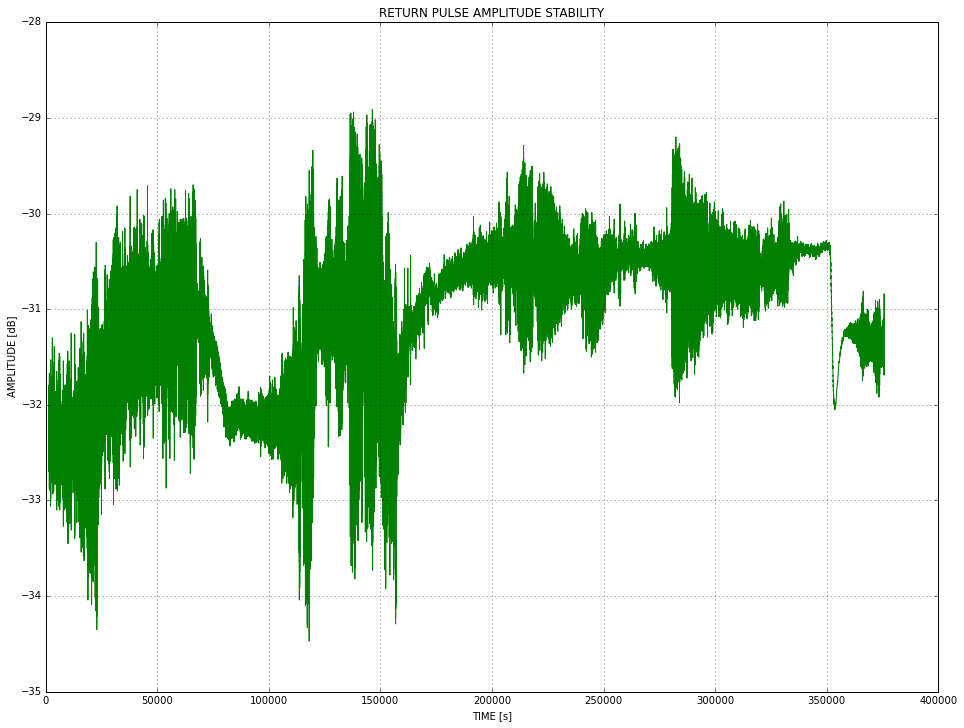

In [56]:
#Plot Amplitude of First peak

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,height1[1500:],'g')
plt.title('RETURN PULSE AMPLITUDE STABILITY')
plt.xlabel('TIME [s]'); plt.ylabel('AMPLITUDE [dB]')
plt.grid(True)

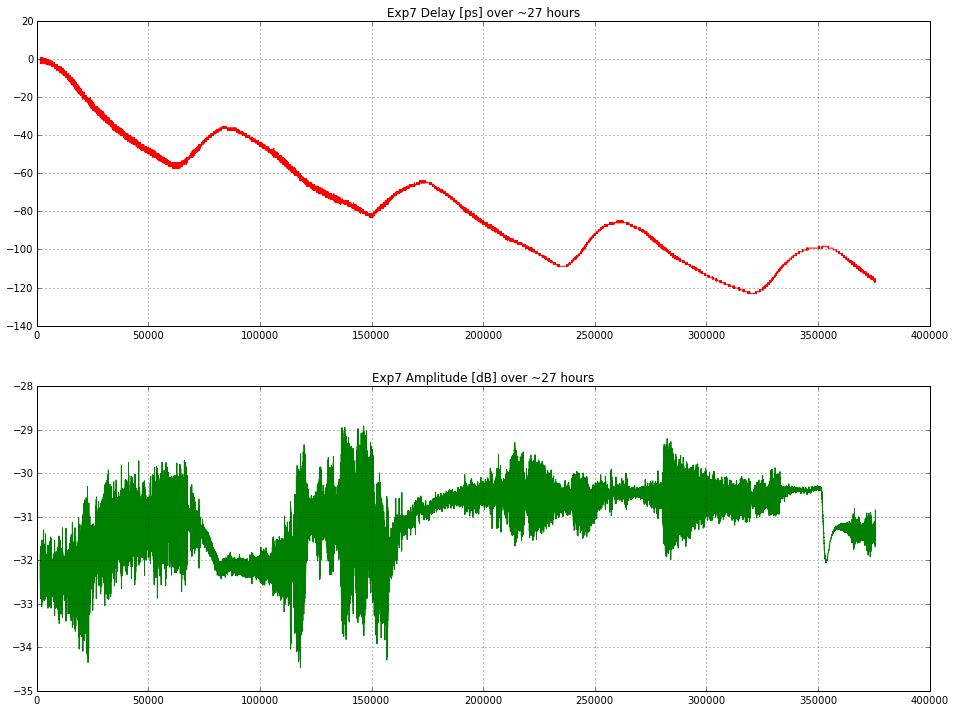

In [57]:
zoomed_slice = slice(103479,144886)
delta_delay2 = 0.5*(temp_delay2-temp_delay2[0])/c*1e12
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.grid(True)
plt.title('Exp7 Delay [ps] over ~27 hours')
plt.plot(timestamps_offset,delta_delay2,'r')
plt.subplot(2,1,2)
plt.grid(True)
plt.title('Exp7 Amplitude [dB] over ~27 hours')
plt.plot(timestamps_offset,height1[1500:],'g')
plt.figure(figsize=(16,12))


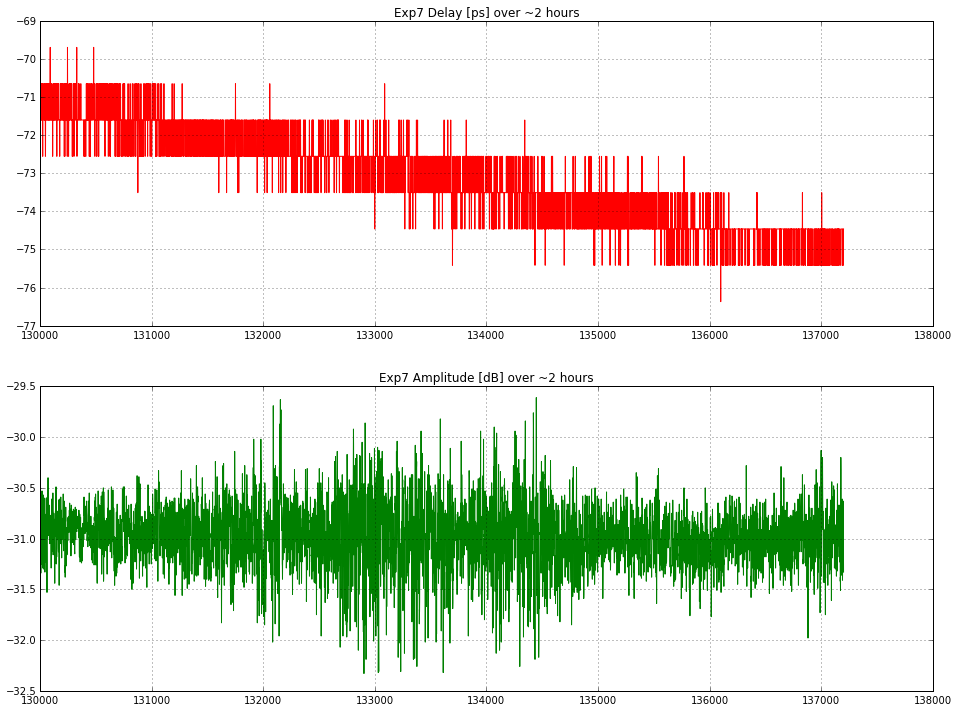

In [58]:
zoomed_slice = slice(122822,129733)
delta_delay2 = 0.5*(temp_delay2[zoomed_slice]-temp_delay2[0])/c*1e12
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.grid(True)
plt.title('Exp7 Delay [ps] over ~2 hours')
plt.plot(timestamps_offset[zoomed_slice],delta_delay2,'r')
plt.subplot(2,1,2)
plt.grid(True)
plt.title('Exp7 Amplitude [dB] over ~2 hours')
plt.plot(timestamps_offset[zoomed_slice],height1[zoomed_slice],'g')
plt.figure(figsize=(16,12))

In [52]:
temp_index = np.where(timestamps_offset.astype(int)==137200)
print temp_index

(array([129733], dtype=int64),)
